In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import ROOT
from ROOT import TH1F, TCanvas

from sklearn.metrics import r2_score

Welcome to JupyROOT 6.30/04


In [2]:
with open("WS_L_100k_largerR_15/datasets_down/run_0/cos_theta_L_100k_largerR_15_0.pkl", "rb") as f:
    results_dict_L = pickle.load(f)
    
with open("WS_R_100k_largerR_15/datasets_down/run_0/cos_theta_R_100k_largerR_15_0.pkl", "rb") as f:
    results_dict_R = pickle.load(f)

In [3]:
def fit_beta(angles, polarization):
    # Convert list to numpy array
    angles = np.array(angles)
    
    # Define polarization
    if "L" in polarization:
        p=-1
    if "R" in polarization:
        p=1    
    
    # Book Histogram
    hist_angles = TH1F( "title", "title", 100, -1, 1 )

    # Book Canvas
    c = ROOT.TCanvas("c", "Histogram Canvas", 800, 600)
    
    # Fill Histogram
    for angle in angles:
        hist_angles.Fill(angle)
        
    hist_angles.Scale(1/hist_angles.Integral("width"))
        
    # Draw Histogram
    hist_angles.Draw()
    #c.SaveAs(title+".png")
    #c.Draw()
        
    # Define Custom Fit Function
    def beta_function(costheta, parameters):
        return 1/2*(1+parameters[0]*costheta[0])
    
    # Initialize Fit Function
    fit = ROOT.TF1("fit", beta_function, -1, 1, 1)
    fit.SetParameters(0)
    fit.SetParNames("p*Beta")
    
    # Perform Fit
    #hist_angles.Fit(fit)
    hist_angles.Fit(fit, "e")
    #hist_angles.Fit(fit, "q")
    
    # Print Results
    fitted_beta = fit.GetParameters()[0]*p
    method_2 = np.mean(angles)*3*p
    positive_angles = len(angles[angles>0])
    negative_angles = len(angles[angles<0])
    method_3 = (positive_angles-negative_angles)/(positive_angles+negative_angles)*2*p
        
    #print(fitted_beta)
    return fitted_beta

In [4]:
beta_raw_L = fit_beta(results_dict_L["raw"], "L")
beta_raw_R = fit_beta(results_dict_R["raw"], "R")

print("Unsculpted {L}: ", beta_raw_L)
print("Unsculpted {R}: ", beta_raw_R)

Unsculpted {L}:  1.005959555454886
Unsculpted {R}:  1.0059520503522088
 FCN=98.8071 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=1.12237e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -1.00596e+00   1.44985e-03   1.44985e-03   3.26784e-07
 FCN=111.091 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=2.62838e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       1.00595e+00   1.70377e-03   1.70377e-03  -4.25546e-06


In [5]:
beta_jet_pT_cut_L = fit_beta(results_dict_L["jet_pT_cut"], "L")
beta_jet_pT_cut_R = fit_beta(results_dict_R["jet_pT_cut"], "R")


print("jet_pT_cut {L}: ", beta_jet_pT_cut_L)
print("jet_pT_cut {R}: ", beta_jet_pT_cut_R)

jet_pT_cut {L}:  1.0044965603542313
jet_pT_cut {R}:  1.0097628546587225
 FCN=143.86 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=1.10645e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -1.00450e+00   1.75576e-03   1.75576e-03  -8.47259e-07
 FCN=149.266 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=2.64497e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       1.00976e+00   2.11766e-03   2.11766e-03  -1.08610e-06


In [6]:
beta_matching_deltaR_cut_L = fit_beta(results_dict_L["matching_deltaR_cut"], "L")
beta_matching_deltaR_cut_R = fit_beta(results_dict_R["matching_deltaR_cut"], "R")

print("jet_pT_cut {L}: ", beta_matching_deltaR_cut_L)
print("jet_pT_cut {R}: ", beta_matching_deltaR_cut_R)

jet_pT_cut {L}:  0.9917405538002275
jet_pT_cut {R}:  1.0114391956915392
 FCN=165.696 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=1.10526e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -9.91741e-01   4.38825e-03   4.38825e-03  -1.07141e-07
 FCN=168.078 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=4.60388e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       1.01144e+00   2.72814e-03   2.72814e-03  -3.51731e-06


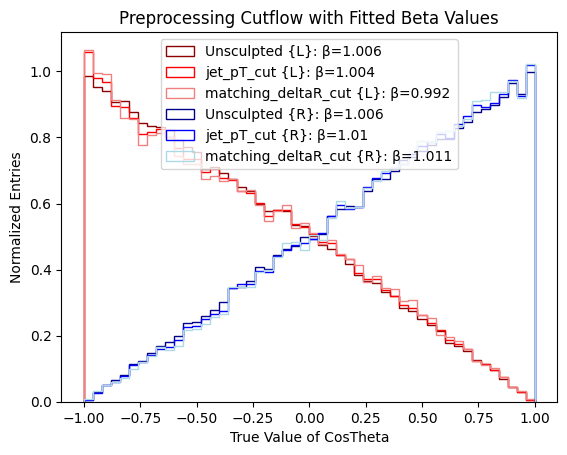

In [7]:
plt.title("Preprocessing Cutflow with Fitted Beta Values")
plt.hist(results_dict_L["raw"],histtype='step',bins=50,range=(-1,1),color='darkred',label='Unsculpted {L}: \u03B2='+str(round(beta_raw_L,3)),linestyle="-",density=True)
plt.hist(results_dict_L["jet_pT_cut"],histtype='step',bins=50,range=(-1,1),color='red',label='jet_pT_cut {L}: \u03B2='+str(round(beta_jet_pT_cut_L,3)),linestyle="-",density=True)
plt.hist(results_dict_L["matching_deltaR_cut"],histtype='step',bins=50,range=(-1,1),color='lightcoral',label='matching_deltaR_cut {L}: \u03B2='+str(round(beta_matching_deltaR_cut_L,3)),linestyle="-",density=True)
plt.hist(results_dict_R["raw"],histtype='step',bins=50,range=(-1,1),color='darkblue',label='Unsculpted {R}: \u03B2='+str(round(beta_raw_R,3)),linestyle="-",density=True)
plt.hist(results_dict_R["jet_pT_cut"],histtype='step',bins=50,range=(-1,1),color='blue',label='jet_pT_cut {R}: \u03B2='+str(round(beta_jet_pT_cut_R,3)),linestyle="-",density=True)
plt.hist(results_dict_R["matching_deltaR_cut"],histtype='step',bins=50,range=(-1,1),color='lightblue',label='matching_deltaR_cut {R}: \u03B2='+str(round(beta_matching_deltaR_cut_R,3)),linestyle="-",density=True)
plt.legend()
plt.ylabel("Normalized Entries")
plt.xlabel("True Value of CosTheta")
plt.show()